In [3]:
library(quanteda)
texts = c("The caged bird sings with a fearful trill", 
          "for the caged bird sings of freedom")
(d = dfm(texts))

Document-feature matrix of: 2 documents, 11 features (31.8% sparse).
2 x 11 sparse Matrix of class "dfm"
       features
docs    the caged bird sings with a fearful trill for of freedom
  text1   1     1    1     1    1 1       1     1   0  0       0
  text2   1     1    1     1    0 0       0     0   1  1       1

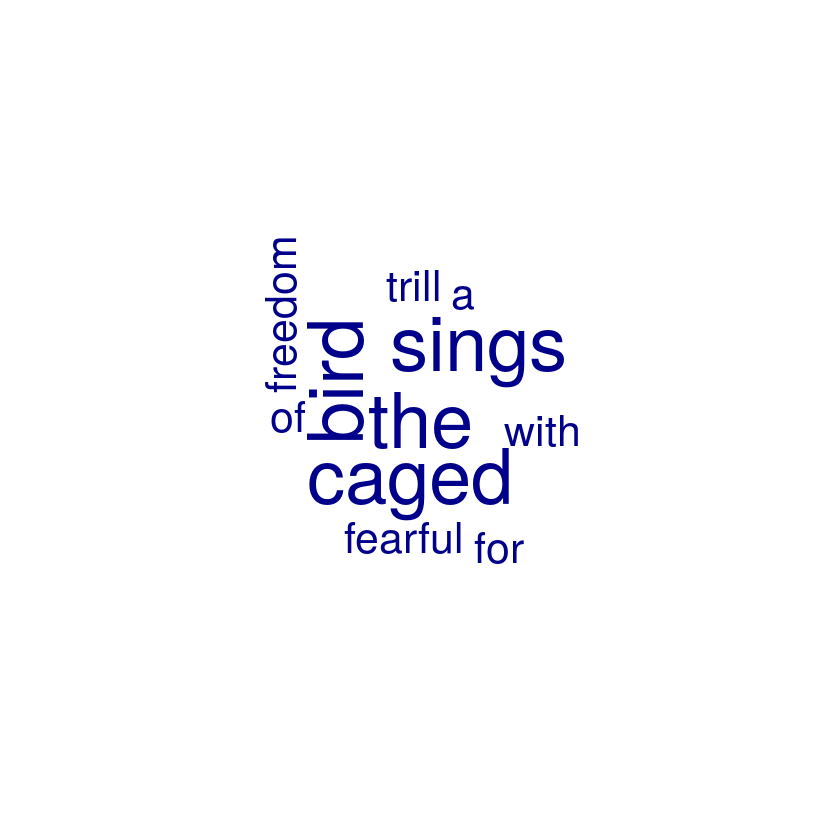

In [5]:
textplot_wordcloud(d, min_count = 1)